# Team 5 Project 2 Trend Signals

## KST Oscillator Trading Signals Feature

### Import libraries and dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import ta as ta
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/Users/kellyerogers/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Read in CSV as Pandas DataFrame

In [2]:
# Set path to CSV and read in CSV
csv_path = Path('../Project-02/TWTR-Sheet1.csv')
twtr_df_trend=pd.read_csv(csv_path)
twtr_df_trend

,Date,Close
0,10/5/15,28.15
1,10/6/15,27.62
2,10/7/15,29.83
3,10/8/15,30.32
4,10/9/15,30.85
5,10/12/15,28.75
6,10/13/15,29.06
7,10/14/15,29.38
8,10/15/15,29.71
9,10/16/15,31.15


### Read in CSV as the TA "Trading Algo" Dataframe and Plot the Trend Indicators for KST Oscillator

In [3]:
csv_path = Path('../Project-02/ta_data.csv')
ta_data=pd.read_csv(csv_path)
ta_data

,Date,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,...,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,nvi_ema
0,2015-10-05,28.250000,26.330000,26.990000,28.150000,31012900,28.150000,2.778238e+07,31012900,0.895833,...,94.791647,94.791647,-5.208353,0.000000,28.150000,0.000000,3.517172,0.000000,0.000000,NaN
1,2015-10-06,28.400000,26.750000,28.160000,27.620001,31294500,27.620001,2.948939e+07,-281600,0.473289,...,62.318894,78.555271,-37.681106,0.000000,27.955291,0.000000,-1.882767,-1.900716,-1.882767,NaN
2,2015-10-07,29.950001,28.010000,28.350000,29.830000,34460700,29.830000,5.968688e+07,34179100,0.616803,...,96.685060,84.598534,-3.314940,0.000000,28.302700,0.000000,8.001445,7.697442,5.968030,NaN
3,2015-10-08,31.500000,29.030001,29.570000,30.320000,36431800,30.320000,6.130933e+07,70610900,0.460281,...,77.176010,78.726655,-22.823990,0.000000,28.672443,0.000000,1.642641,1.629295,7.708704,NaN
4,2015-10-09,31.410000,30.280001,30.900000,30.850000,27453600,30.850000,6.155229e+07,98064500,0.383137,...,87.427474,87.096181,-12.572526,0.000000,29.045544,0.000000,1.748023,1.732921,9.591477,NaN
5,2015-10-12,30.770000,28.600000,30.299999,28.750000,30619500,28.750000,3.516589e+07,67445000,0.183852,...,46.808511,70.470665,-53.191489,0.363333,28.985871,0.000000,-6.807132,-7.049900,2.131440,NaN
6,2015-10-13,30.680000,28.840000,29.549999,29.059999,45783200,29.059999,3.308108e+05,113228200,0.001395,...,52.804633,62.346873,-47.195367,0.707000,28.999677,0.000000,1.078259,1.072487,3.232682,NaN
7,2015-10-14,29.820000,28.379999,29.459999,29.379999,27554400,29.379999,1.104640e+07,140782600,0.041746,...,58.994182,52.869109,-41.005818,0.743500,29.084089,0.000000,1.101169,1.095150,4.369448,NaN
8,2015-10-15,30.280001,29.010000,29.459999,29.709999,15838900,29.709999,1.266767e+07,156621500,0.045169,...,65.377159,59.058658,-34.622841,0.568667,29.207956,0.000000,1.123213,1.116952,5.541739,NaN
9,2015-10-16,31.400000,29.360001,30.080000,31.150000,44564000,31.150000,4.630911e+07,201185500,0.142484,...,93.230167,72.533836,-6.769833,0.361500,29.549545,0.000000,4.846855,4.733057,10.657194,NaN


In [4]:
# Pull the KST columns from the TA dataframe
kst_df = ta_data[['trend_kst','trend_kst_sig','trend_kst_diff']]
kst_df['Zero'] = 0
kst_df['converted'] = np.where(kst_df['trend_kst_diff'] > 0, 1, -1)

kst_df

,trend_kst,trend_kst_sig,trend_kst_diff,Zero,converted
0,35.171717,35.171717,0.000000,0,-1
1,25.426784,30.299251,-4.872467,0,-1
2,49.268213,36.622238,12.645975,0,1
3,65.693669,43.890096,21.803573,0,1
4,79.446931,51.001463,28.445468,0,1
5,75.745073,55.125398,20.619675,0,1
6,74.729423,57.925973,16.803450,0,1
7,75.438620,60.115054,15.323567,0,1
8,77.338577,62.028779,15.309799,0,1
9,84.153917,67.471245,16.682672,0,1


In [5]:
kst_df.to_csv("kst_trend_signals.csv")

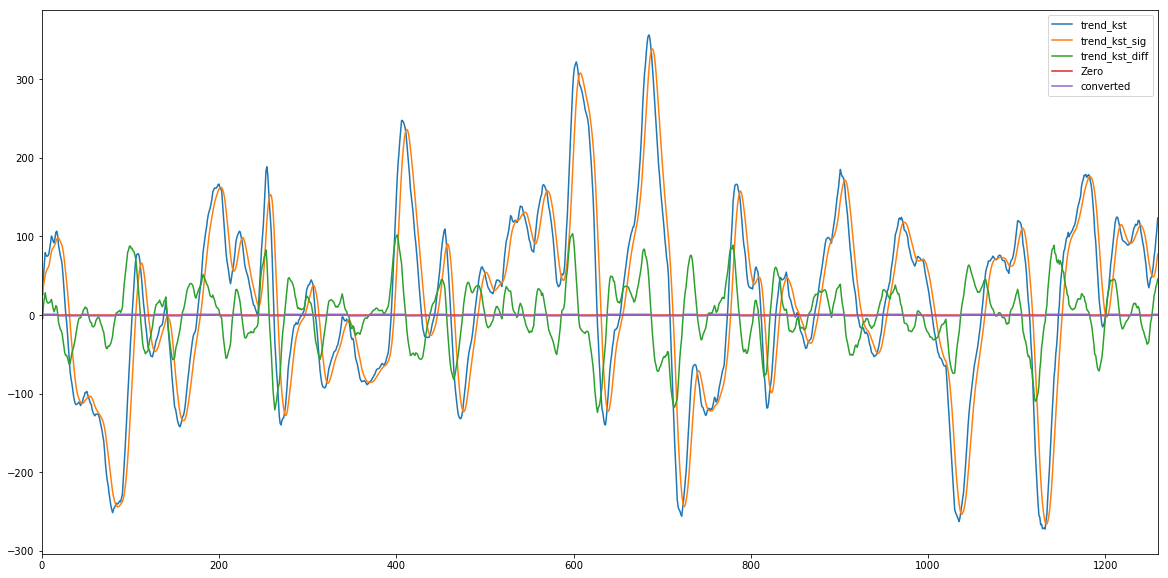

In [6]:
kst_df.plot(figsize=(20,10))

In [7]:
    """The Know Sure Thing (KST) Indicator is a 
    two-line indicator. A buy signal is generated 
    when the Know Sure Thing crosses above the 
    zero line or makes a crossover above its 
    signal line. </breakIf the KST crosses below 
    the zero line or makes a crossover below the
    signal line a sell signal is generated."""

'The Know Sure Thing (KST) Indicator is a \ntwo-line indicator. A buy signal is generated \nwhen the Know Sure Thing crosses above the \nzero line or makes a crossover above its \nsignal line. </breakIf the KST crosses below \nthe zero line or makes a crossover below the\nsignal line a sell signal is generated.'

In [8]:
# Initialize `side` column for buys and sells
kst_df['side'] = np.nan

# Initialize variable to hold previous price
previous_price = 0

# Loop through the Pandas DataFrame and initiate a... 
# buy signal is generated when the trend_kst crosses above the zero line.
# buy signal is generated when the trend_kst makes a crossover above its trend_kst_sig.
# sell signal is generated when trend_kst crosses below the zero line.
# sell signal is generated when trend_kst makes a crossover below the trend_kst_sig.
# hold if the current day price is equal to the previous day price
'''
for index, row in kst_df.iterrows():

    if previous_price == 0:
        kst_df.loc[index, "side"] = "hold"
    elif row["trend_kst"] > 0 or row["trend_kst"]:
        kst_df.loc[index, "side"] = "buy"
    elif row["trend_kst"] < 0 or row["trend_kst"]:
        kst_df.loc[index, "side"] = "sell"
    else:
        kst_df.loc[index, "side"] = "hold"

    previous_price = row["Close"]
'''
kst_df['signal'] = np.where(kst_df['trend_kst'] > kst_df['trend_kst_sig'], 1.0, 0.0)
kst_df['entry/exit'] = kst_df['signal'].diff()
# Print the DataFrame
kst_df

,trend_kst,trend_kst_sig,trend_kst_diff,Zero,converted,side,signal,entry/exit
0,35.171717,35.171717,0.000000,0,-1,NaN,0.0,NaN
1,25.426784,30.299251,-4.872467,0,-1,NaN,0.0,0.0
2,49.268213,36.622238,12.645975,0,1,NaN,1.0,1.0
3,65.693669,43.890096,21.803573,0,1,NaN,1.0,0.0
4,79.446931,51.001463,28.445468,0,1,NaN,1.0,0.0
5,75.745073,55.125398,20.619675,0,1,NaN,1.0,0.0
6,74.729423,57.925973,16.803450,0,1,NaN,1.0,0.0
7,75.438620,60.115054,15.323567,0,1,NaN,1.0,0.0
8,77.338577,62.028779,15.309799,0,1,NaN,1.0,0.0
9,84.153917,67.471245,16.682672,0,1,NaN,1.0,0.0
